<a href="https://colab.research.google.com/github/MHzNug/Capstone-Project/blob/main/Inferensi_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


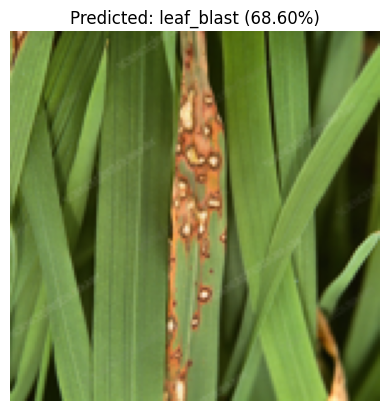

In [ ]:
# --- Load gambar test ---
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Input
from keras.layers import TFSMLayer
from tensorflow.keras.models import Model

# URL gambar
img_url = 'https://media.sciencephoto.com/image/b2750111/800wm/B2750111-Rice_infected_with_blast_disease.jpg'

# Unduh gambar dari URL
response = requests.get(img_url)
img = Image.open(BytesIO(response.content)).convert("RGB")
img = img.resize((150, 150))  # Resize manual jika tidak lewat image.load_img
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# --- Load SavedModel sebagai Layer ---
saved_model_path = "/content/saved_model"
model_loaded = TFSMLayer(saved_model_path, call_endpoint="serving_default")

# --- Bungkus dalam Model baru ---
input_layer = Input(shape=img_array.shape[1:])
output_layer = model_loaded(input_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# --- Inference ---
pred_dict = model.predict(img_array)

# --- Ambil nilai array prediksi dari dict ---
pred = list(pred_dict.values())[0]

# --- Daftar kelas secara manual (urutannya HARUS sesuai dengan output model) ---
class_names = ['leaf_blast', 'rice_hispa', 'leaf_scald', 'neck_blast',
               'narrow_brown_spot', 'sheath_blight', 'healthy',
               'bacterial_leaf_blight', 'brown_spot', 'tungro']

# --- Ambil kelas dan confidence ---
predicted_class = class_names[np.argmax(pred)]
confidence = np.max(pred) * 100

# --- Tampilkan Gambar + Prediksi ---
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
plt.show()